### 1 - Download the dataset
We are using Viren Dhanwani's workspace which has a quite collection of labeled images on tennis balls. I chose to download YoloV5 version because it is a faster near state-of-art YOLO model and will give us a nice approach to achieve high accuracy on our detection task.

In [ ]:
%pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="YOUR_ROBOFLOW_API_KEY")
project = rf.workspace("viren-dhanwani").project("tennis-ball-detection")
version = project.version(6)
dataset = version.download("yolov5")

### 1.1 - Reorganize dataset directories
We are reorganizing the dataset folders by putting them inside an omoninous folder as a common practice when structuring data based projects.

In [ ]:
import shutil

dataset_dir = 'tennis-ball-detection-6'

shutil.move(f'{dataset_dir}/train',
f'{dataset_dir}/{dataset_dir}/train',
)
shutil.move(f'{dataset_dir}/test',
f'{dataset_dir}/{dataset_dir}/test',
)
shutil.move(f'{dataset_dir}/valid',
f'{dataset_dir}/{dataset_dir}/valid',
)

### 2 - Training model
In order to achieve the best accuracy on our detection task, we will train [YOLO 5.16](https://docs.ultralytics.com/yolov5/), known for its near-state-of-art performance and lightness when compared to more complex models. I strongly recommend using Google Colab's free GPUs. For comparison, the same task took 45 minutes using Colab's Nvidia Tesla T4 GPU.

In [ ]:
%pip install ultralytics
%pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

In [ ]:
from ultralytics import YOLO

model = YOLO('yolov5l6u.pt')

results = model.train(data='tennis-ball-detection-6/data.yaml', epochs=100, imgsz=640, device=0)

### 3 - Tennis court keypoint model
In order to track player 1, player 2 and ball positions, we could train a model to identify keypoints on the tennis court, and then use them as a reference to track their movement data along the court. Our inspiration comes from an amazing deep learning project with the same purpose, proposed by [Yastrebksv](https://github.com/yastrebksv/TennisCourtDetector). We are also using his dataset to train our keypoint model.

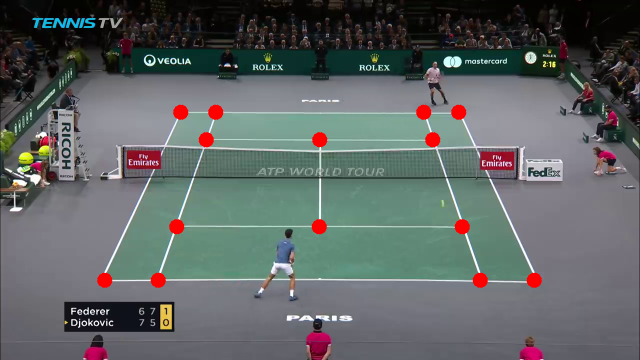
